In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

path = '../../../../playwright/results/core-web-vitals/testrun-8/'
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams.update({'font.size': 14})

features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config', 'nf:loaded']

def detect_outliers(df, features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(df[features])
    return outliers == 1

In [2]:
target_features = ['ttfb', 'fcp', 'tti', 'lcp']

dirty_dfs =	{
  "CSR": pd.read_csv(f'{path}2024-12-16T09:36:50.835Z_results-csr.csv', sep=',').iloc[5:],
  "SSRH": pd.read_csv(f'{path}2024-12-15T22:05:17.080Z_results-ssrh.csv', sep=',').iloc[5:],
}

In [3]:
masks = {}
dfs = {}

for name, df in dirty_dfs.items():
    mask = detect_outliers(df, target_features)
    masks[name] = mask
    dfs[name] = df[mask].copy()

In [4]:
keys = list(dfs.keys())

results = pd.DataFrame([
    [metric, 'two-sided', stats.mannwhitneyu(dfs[keys[0]][metric], 
                                   dfs[keys[1]][metric], 
                                   alternative='two-sided')[1]]
    for metric in target_features
], columns=['metric', 'hypothesis', 'p_value'])

results['adjusted_p'] = multipletests(results['p_value'], method='bonferroni')[1]
results['significant'] = results['adjusted_p'] < 0.05

compact_format = lambda x: '%.3e' % x if x < 0.00001 else '%.5f' % x
results['p_value'] = results['p_value'].apply(compact_format)
results['adjusted_p'] = results['adjusted_p'].apply(compact_format)

results

,metric,hypothesis,p_value,adjusted_p,significant
0,ttfb,two-sided,1.006e-148,4.025e-148,True
1,fcp,two-sided,1.180e-148,4.721e-148,True
2,tti,two-sided,1.180e-148,4.721e-148,True
3,lcp,two-sided,1.182e-148,4.729e-148,True


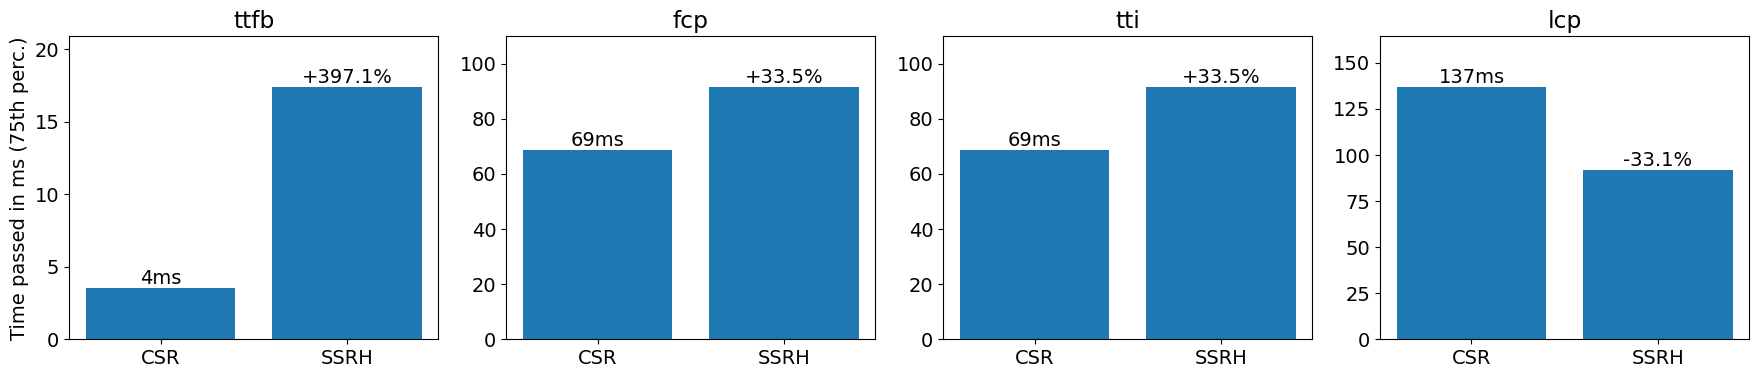

In [5]:
fig, axes = plt.subplots(ncols=len(target_features), figsize=(18, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)

for idx, feature in enumerate(target_features):
    percentiles = {d: dfs[d][feature].quantile(0.75) for d in dfs}
    bars = axes[idx].bar(percentiles.keys(), percentiles.values())
    baseline = list(percentiles.values())[0]

    max_height = max(percentiles.values())
    axes[idx].set_ylim(0, max_height * 1.2)
    
    for i, bar in enumerate(bars):
        percentage = ((bar.get_height() / baseline) - 1) * 100
        label = f'{int(round(bar.get_height(), 0))}ms' if (i == 0) else f'{percentage:+.1f}%'
        axes[idx].text(bar.get_x() + bar.get_width()/2., bar.get_height(), label, ha='center', va='bottom')
    
    axes[idx].set_title(feature)
    if idx == 0:
        axes[idx].set_ylabel('Time passed in ms (75th perc.)')

plt.tight_layout()
plt.show()

In [6]:
target_features = ['tbt','ttfb', 'fcp', 'tti', 'lcp']

dirty_dfs =	{
  "CSR": pd.read_csv(f'{path}2024-12-16T11:08:37.924Z_results-csr-throttled.csv', sep=',').iloc[5:],
  "SSRH": pd.read_csv(f'{path}2024-12-15T23:30:49.336Z_results-ssrh-throttled.csv', sep=',').iloc[5:],
  "SSRV": pd.read_csv(f'{path}2024-12-17T18:41:33.545Z_results-ssrv-sd-throttled.csv', sep=',').iloc[5:],
}

masks = {}
dfs = {}

for name, df in dirty_dfs.items():
    mask = detect_outliers(df, target_features)
    masks[name] = mask
    dfs[name] = df[mask].copy()

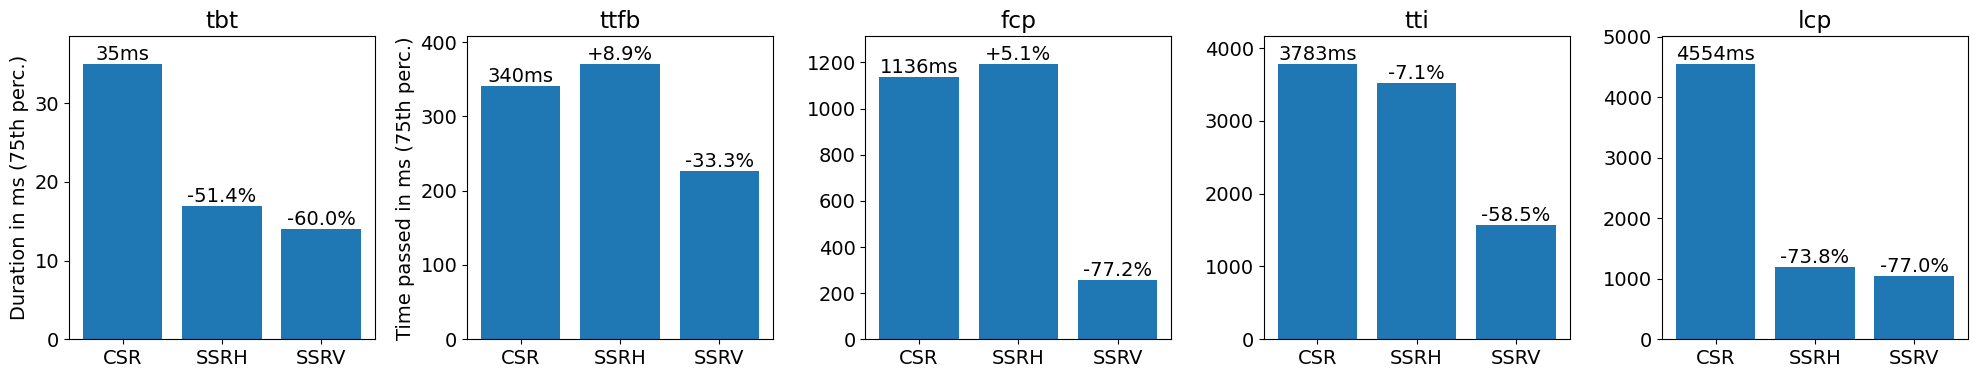

In [7]:
fig, axes = plt.subplots(ncols=len(target_features), figsize=(20, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)

for idx, feature in enumerate(target_features):
    percentiles = {d: dfs[d][feature].quantile(0.75) for d in dfs}
    bars = axes[idx].bar(percentiles.keys(), percentiles.values())
    baseline = list(percentiles.values())[0]

    max_height = max(percentiles.values())
    axes[idx].set_ylim(0, max_height * 1.10)
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = ((height / baseline) - 1) * 100
        label = f'{int(round(height, 0))}ms' if (i == 0) else f'{percentage:+.1f}%'
        axes[idx].text(bar.get_x() + bar.get_width()/2., height, label, ha='center', va='bottom')
    
    axes[idx].set_title(feature)
    if idx == 0:
        axes[idx].set_ylabel('Duration in ms (75th perc.)')
    if idx == 1:
        axes[idx].set_ylabel('Time passed in ms (75th perc.)')

plt.tight_layout()
plt.show()

In [8]:
target_features = ['tbt','ttfb', 'fcp', 'tti', 'lcp']

dirty_dfs =	{
  "CSR": pd.read_csv(f'{path}2024-12-16T12:37:45.058Z_results-csr-throttled-heavy.csv', sep=',').iloc[5:],
  "SSRH": pd.read_csv(f'{path}2024-12-16T07:53:32.348Z_results-ssrh-throttled-heavy.csv', sep=',').iloc[5:],
  "SSRV": pd.read_csv(f'{path}2024-12-17T20:20:42.349Z_results-ssrv-sd-throttled-heavy.csv', sep=',').iloc[5:],
}

masks = {}
dfs = {}

for name, df in dirty_dfs.items():
    mask = detect_outliers(df, target_features)
    masks[name] = mask
    dfs[name] = df[mask].copy()

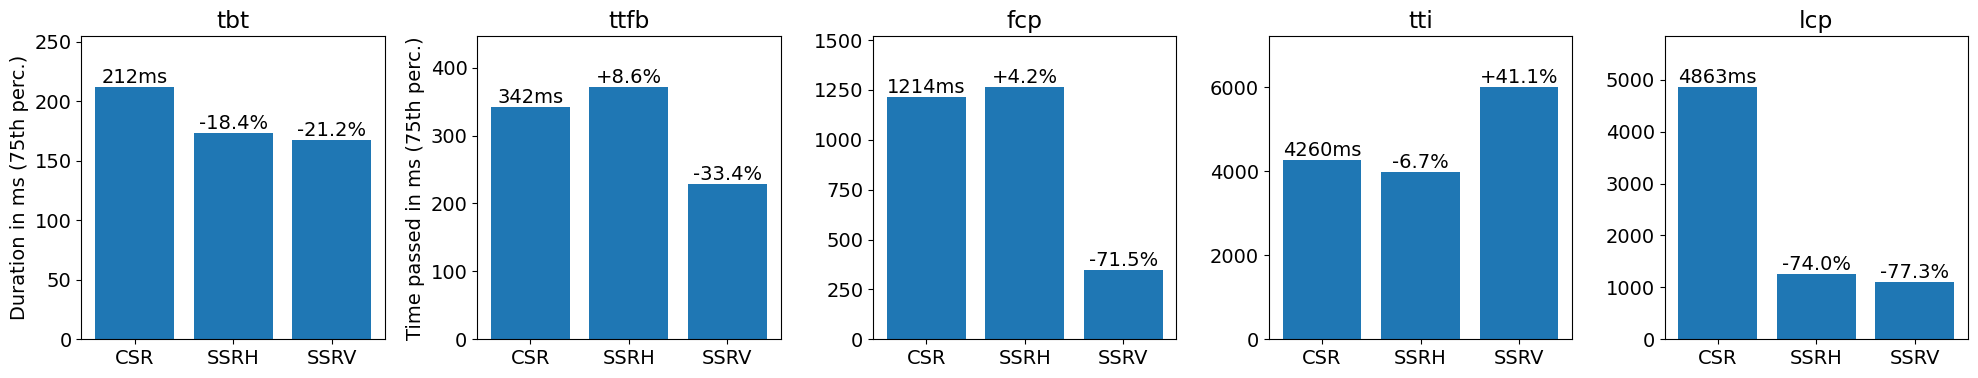

In [9]:
fig, axes = plt.subplots(ncols=len(target_features), figsize=(20, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)

for idx, feature in enumerate(target_features):
    percentiles = {d: dfs[d][feature].quantile(0.75) for d in dfs}
    bars = axes[idx].bar(percentiles.keys(), percentiles.values())
    baseline = list(percentiles.values())[0]

    max_height = max(percentiles.values())
    axes[idx].set_ylim(0, max_height * 1.2)
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = ((height / baseline) - 1) * 100
        label = f'{int(round(height, 0))}ms' if (i == 0) else f'{percentage:+.1f}%'
        axes[idx].text(bar.get_x() + bar.get_width()/2., height, label, ha='center', va='bottom')
    
    axes[idx].set_title(feature)
    if idx == 0:
        axes[idx].set_ylabel('Duration in ms (75th perc.)')
    if idx == 1:
        axes[idx].set_ylabel('Time passed in ms (75th perc.)')

plt.tight_layout()
plt.show()